## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [ ]:
import os
os.environ["JAVA_HOME"]="C:\Program Files\Java\jre1.8.0_291"
os.environ["PATH"]=os.environ["JAVA_HOME"]+"/bin:"+os.environ["PATH"]


In [ ]:
import findspark 
findspark.init()
import pyspark 

from pyspark.sql import SparkSession
from pyspark.sql.functions import count

spark = (SparkSession
.builder
.appName("DataFrame")
.getOrCreate())

### Create a data schema programatically

In [ ]:
from pyspark.sql.types import *
schema = StructType([StructField("id", IntegerType(), False),
                     StructField("gender", StringType(), False),
                     StructField("age", DoubleType(), False),
                      StructField("hypertension", IntegerType(), False),
                      StructField("heart_disease", IntegerType(), False),
                      StructField("ever_married", StringType(), False),
                      StructField("work_type", StringType(), False),
                     StructField("Residence_type", StringType(), False),
                     StructField("avg_glucose_level", DoubleType(), False),
                     StructField("bmi", DoubleType(), False),
                     StructField("smoking_status", StringType(), False),
                     StructField("stroke", IntegerType(), False)
                     ])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [ ]:
df = spark.read.csv('healthcare-dataset-stroke-data.csv',schema=schema,header=True)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
df.head(10)

[Row(id=9046, gender='Male', age=67.0, hypertension=0, heart_disease=1, ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level=228.69, bmi=36.6, smoking_status='formerly smoked', stroke=1),
 Row(id=51676, gender='Female', age=61.0, hypertension=0, heart_disease=0, ever_married='Yes', work_type='Self-employed', Residence_type='Rural', avg_glucose_level=202.21, bmi=None, smoking_status='never smoked', stroke=1),
 Row(id=31112, gender='Male', age=80.0, hypertension=0, heart_disease=1, ever_married='Yes', work_type='Private', Residence_type='Rural', avg_glucose_level=105.92, bmi=32.5, smoking_status='never smoked', stroke=1),
 Row(id=60182, gender='Female', age=49.0, hypertension=0, heart_disease=0, ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level=171.23, bmi=34.4, smoking_status='smokes', stroke=1),
 Row(id=1665, gender='Female', age=79.0, hypertension=1, heart_disease=0, ever_married='Yes', work_type='Self-employed', Residence

In [ ]:
from pyspark.sql.functions import *
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [ ]:
df.groupBy(df.stroke).count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  249|
|     0| 4861|
+------+-----+



In [ ]:
pandasDF = df.toPandas()


5110


<AxesSubplot:xlabel='stroke', ylabel='count'>

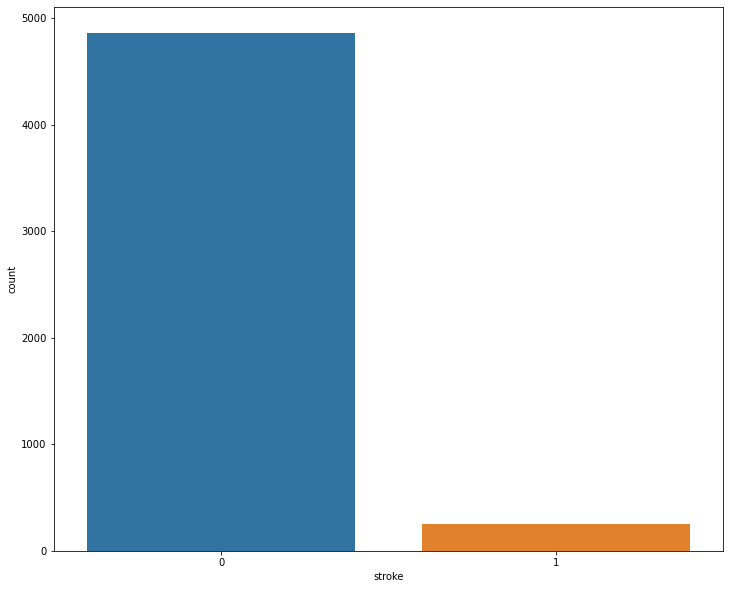

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pandasDF = df.toPandas()
print(len(pandasDF))
plt.figure(figsize=(12,10))
sns.countplot(x='stroke', data=pandasDF, order=pandasDF['stroke'].value_counts().index)

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [ ]:
df.describe(['age']).show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [ ]:
new_df = df.filter(df.age>2)

In [ ]:
new_df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [ ]:
new_df.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [ ]:
new_df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [ ]:
new_df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [ ]:
gender_map = {'Male':1 , 'Female':0 , 'Other':0}
smoking = {'never smoked':0 , 'Unknown':0.5 ,'formerly smoked':0.75  ,'smokes' :1 }

In [ ]:
from pyspark.sql.functions import udf
def impute_gender(gen):
    return gender_map[gen]

udf_new1=udf(lambda x: impute_gender(x))


def impute_smoke(smk):
    return smoking[smk]

udf_new2=udf(lambda x: impute_smoke(x))

In [ ]:
from pyspark.sql import functions as f

new_df_1=new_df.withColumn('Gender',udf_new1(f.col('gender')))

In [ ]:
new_df_2=new_df_1.withColumn('Smoking_status',udf_new2(f.col('smoking_status')))

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [ ]:
new_df_2.select('Smoking_status','Gender').show()

+--------------+------+
|Smoking_status|Gender|
+--------------+------+
|          0.75|     1|
|             0|     0|
|             0|     1|
|             1|     0|
|             0|     0|
|          0.75|     1|
|             0|     1|
|             0|     0|
|           0.5|     0|
|           0.5|     0|
|             0|     0|
|             1|     0|
|             1|     0|
|           0.5|     1|
|             0|     0|
|             0|     0|
|             1|     1|
|             1|     1|
|             0|     0|
|           0.5|     1|
+--------------+------+
only showing top 20 rows



In [ ]:
new_df_3=new_df_2.withColumn("gender",col("Gender").cast(IntegerType()))


In [ ]:
new_df_4=new_df_3.withColumn("smoking_status",col("Smoking_status").cast(FloatType()))


In [ ]:
new_df_4.select('smoking_status','gender').show()

+--------------+------+
|smoking_status|gender|
+--------------+------+
|          0.75|     1|
|           0.0|     0|
|           0.0|     1|
|           1.0|     0|
|           0.0|     0|
|          0.75|     1|
|           0.0|     1|
|           0.0|     0|
|           0.5|     0|
|           0.5|     0|
|           0.0|     0|
|           1.0|     0|
|           1.0|     0|
|           0.5|     1|
|           0.0|     0|
|           0.0|     0|
|           1.0|     1|
|           1.0|     1|
|           0.0|     0|
|           0.5|     1|
+--------------+------+
only showing top 20 rows



In [ ]:
new_df_4.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: float (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [ ]:
mean_bmi = new_df_4.select(f.mean(col('bmi')).alias('mean')).collect()
mean = mean_bmi[0]['mean']
print(mean)

29.257489451476793


In [ ]:
last_df=new_df_4.na.fill(value=mean,subset=["bmi"])

### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [ ]:
trainDF, testDF = last_df.randomSplit([.8,.2],seed=42)
print(f"There are {trainDF.count()} rows in the training set, and {testDF.count()} in the test set")
trainDF.write.parquet('train_data')
testDF.write.parquet('test_data')

There are 3991 rows in the training set, and 944 in the test set


### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
train=spark.read.parquet('train.parquet')
test=spark.read.parquet('test.parquet')


### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [ ]:
categorical_columns = [field for (field,dataType) in train.dtypes if ((dataType == 'string'))]
print((categorical_columns))

['ever_married', 'work_type', 'Residence_type']


In [ ]:
indexOutput= [x + "_Index" for x in categorical_columns]

In [ ]:
OneHotColumns = [x + "_ OHE" for x in categorical_columns]

In [ ]:
from pyspark.ml.feature import VectorAssembler ,StringIndexer,OneHotEncoder

stringIndexer = StringIndexer(inputCols=categorical_columns ,outputCols=indexOutput,handleInvalid='skip')
onehotEncoder = OneHotEncoder(inputCols=indexOutput,outputCols=OneHotColumns)

numericColumns  = [field for (field,dataType) in trainDF.dtypes if ((dataType == 'double') | (dataType =='int') |(dataType =='float') ) & ((field != 'stroke') &(field != 'id')) ]


In [ ]:
print(numericColumns)

['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']


In [ ]:
assembler_Inputs = OneHotColumns + numericColumns

In [ ]:
vecAssembler = VectorAssembler(inputCols=assembler_Inputs , outputCol='features')

In [ ]:
from pyspark.ml.classification import LogisticRegression

model = LogisticRegression(labelCol='stroke',featuresCol='features')

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[stringIndexer,onehotEncoder,vecAssembler,model])
pipeline_Model = pipeline.fit(train)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [ ]:
predictions = pipeline_Model.transform(test)

In [ ]:
predictions.select('features').show(truncate=False)

+-------------------------------------------------------------------------+
|features                                                                 |
+-------------------------------------------------------------------------+
|(13,[0,1,5,6,7,10,11],[1.0,1.0,1.0,1.0,55.0,89.17,31.5])                 |
|(13,[1,5,7,10,11],[1.0,1.0,24.0,97.55,26.2])                             |
|(13,[0,1,7,10,11],[1.0,1.0,33.0,86.97,42.2])                             |
|(13,[0,1,7,10,11,12],[1.0,1.0,43.0,88.23,37.6,0.5])                      |
|(13,[0,1,5,6,7,10,11],[1.0,1.0,1.0,1.0,79.0,198.79,24.9])                |
|(13,[0,1,7,10,11],[1.0,1.0,43.0,110.32,28.4])                            |
|(13,[0,2,6,7,8,10,11],[1.0,1.0,1.0,78.0,1.0,75.19,27.6])                 |
|(13,[0,2,5,7,10,11],[1.0,1.0,1.0,74.0,74.96,26.6])                       |
|(13,[4,7,10,11,12],[1.0,14.0,92.22,22.8,0.5])                            |
|(13,[0,1,6,7,10,11,12],[1.0,1.0,1.0,69.0,101.52,26.8,1.0])               |
|(13,[0,3,6,

In [ ]:
predictions.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: float (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_ OHE: vector (nullable = true)
 |-- work_type_ OHE: vector (nullable = true)
 |-- Residence_type_ OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
predictions.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
predictions.select('stroke','prediction').filter(predictions.stroke==1).show()  

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  943|
|       1.0|    1|
+----------+-----+



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [ ]:
evaluatorROC.evaluate(predictions)

0.4994475138121547

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [ ]:
from pyspark.sql.functions import when
ratio = 0.95

def weight_balance(labels):
    return when(labels == 1, ratio).otherwise(1*(1-ratio))




In [ ]:
last_train= train.withColumn('weights', weight_balance(col('stroke')))


In [ ]:
from pyspark.ml import Pipeline
model_last = LogisticRegression(labelCol='stroke',featuresCol='features',weightCol='weights')

pipeline = Pipeline(stages=[stringIndexer,onehotEncoder,vecAssembler,model_last])
pipeline_Model = pipeline.fit(last_train)

In [ ]:
predictions_last = pipeline_Model.transform(test)

In [ ]:
predictions_last.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: float (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_ OHE: vector (nullable = true)
 |-- work_type_ OHE: vector (nullable = true)
 |-- Residence_type_ OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
predictions_last.select('features').show(truncate=False)

+-------------------------------------------------------------------------+
|features                                                                 |
+-------------------------------------------------------------------------+
|(13,[0,1,5,6,7,10,11],[1.0,1.0,1.0,1.0,55.0,89.17,31.5])                 |
|(13,[1,5,7,10,11],[1.0,1.0,24.0,97.55,26.2])                             |
|(13,[0,1,7,10,11],[1.0,1.0,33.0,86.97,42.2])                             |
|(13,[0,1,7,10,11,12],[1.0,1.0,43.0,88.23,37.6,0.5])                      |
|(13,[0,1,5,6,7,10,11],[1.0,1.0,1.0,1.0,79.0,198.79,24.9])                |
|(13,[0,1,7,10,11],[1.0,1.0,43.0,110.32,28.4])                            |
|(13,[0,2,6,7,8,10,11],[1.0,1.0,1.0,78.0,1.0,75.19,27.6])                 |
|(13,[0,2,5,7,10,11],[1.0,1.0,1.0,74.0,74.96,26.6])                       |
|(13,[4,7,10,11,12],[1.0,14.0,92.22,22.8,0.5])                            |
|(13,[0,1,6,7,10,11,12],[1.0,1.0,1.0,69.0,101.52,26.8,1.0])               |
|(13,[0,3,6,

In [ ]:
predictions_last.select('stroke','prediction').filter(predictions_last.stroke==1).show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
+------+----------+
only showing top 20 rows



In [ ]:
last_train.select('stroke','weights').show()

+------+--------------------+
|stroke|             weights|
+------+--------------------+
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     1|                0.95|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
|     0|0.050000000000000044|
+------+--------------------+
only showing top 20 rows



## ROC  75.69%

In [ ]:
evaluatorROC.evaluate(predictions_last)

0.7569910752231194